# Lab 4: Comparison of Classifiers

This notebook demonstrates how to choose the best out of a few alternative classification models by applying cross-validation and comparing the accuracy of prediction, the F1-scores and the ROC curves of the classification models.

Here we use a _modified version_ of the __seeds data set__ (see https://archive.ics.uci.edu/ml/datasets/seeds), which is one of the public UCI data sets. Each example is a seed described by a few numerical attributes. The target variable for classification (in this example) is the type of the seed, which can be either 1 or 0. Class 1 are the seeds of a particular type that, we can assume, is important to learn to predict correctly, while class 0 are all other seeds.

In this example, we use 5-fold cross-validation. Empirical evidence suggests that 10 folds are probably the best choice for cross-validation, i.e. 10-fold cross-validation. However, since this data set is relatively small, and 1/10 of it is only 21 examples, it is sensible to use larger folds for testing. Thus, we demonstrate the comparison of classifiers with 5-fold cross-validation.

The code in this notebook was originally inspired by the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html.

## A. Preparation

### Import Python modules

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

from scipy import interp

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Import evaluation and plotting functions

In [3]:
%run ./Lab4_Functions_18263461.ipynb

### Load and prepare the dataset for training and evaluating a classifier
Feel free to apply any other pre-processing technique at this point.

In [4]:
lab4_df = pd.read_csv("./seeds_dataset_binary.csv")
lab4_df.describe()


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.333333
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.472531
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000


In [5]:
# target attribute
target = lab4_df['type']

# predictor attributes
predictors = lab4_df.drop('type', axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [6]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

## B. Evaluation and Comparison of Classifiers

### Train a Probablistic SVM Classifier

In [7]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, _recalls_SVM, _precisions_SVM = evaluate_classifier(folds=5, 
                                                                        p=predictors, t=target, 
                                                                        classifier=SVM_classifier, 
                                                                        mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

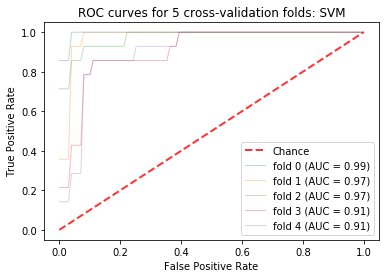

In [8]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

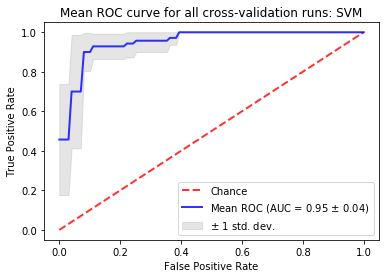

In [9]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train a Naive Bayes Classifier

In [10]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB, _recalls_NB, _precisions_NB = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

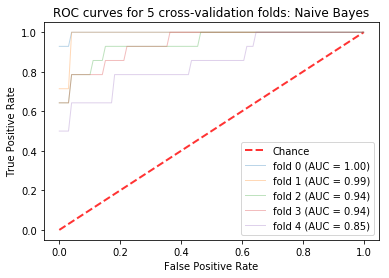

In [11]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

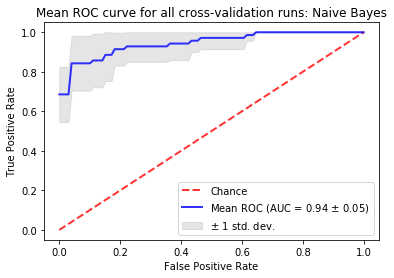

In [12]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Compare All Trained Classifiers

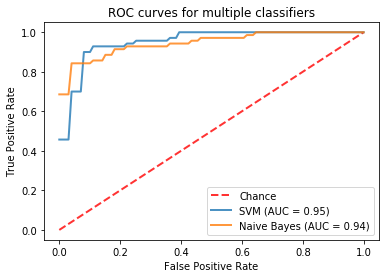

In [13]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB)]), 
                              np.array(['SVM', 'Naive Bayes']))

In [14]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB})

In [15]:
accuracies_df.describe()

,SVM,Naive Bayes
count,5.000000,5.000000
mean,0.876190,0.880952
std,0.045799,0.078967
min,0.809524,0.761905
25%,0.857143,0.857143
50%,0.880952,0.880952
75%,0.904762,0.952381
max,0.928571,0.952381


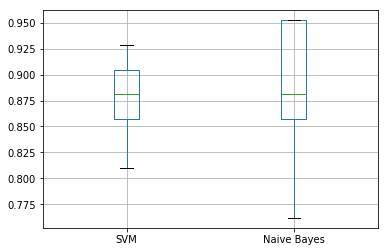

In [16]:
accuracies_df.boxplot()

In [17]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB})

In [18]:
f1_scores_df.describe()

,SVM,Naive Bayes
count,5.000000,5.000000
mean,0.804812,0.824418
std,0.056227,0.116353
min,0.750000,0.642857
25%,0.769231,0.800000
50%,0.782609,0.827586
75%,0.833333,0.923077
max,0.888889,0.928571


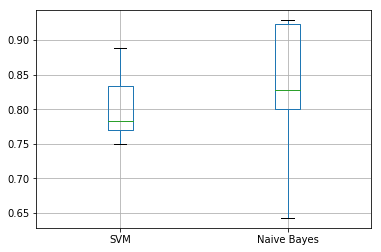

In [19]:
f1_scores_df.boxplot()

#### Conclusion

In this example, both the SVM and the Naive Bayes classifiers have mean accuracy approximately 88%, which is quite high. The ROC curves do not suggest a clear winner, although it can be noted that Naive Bayes can achieve TPR above 80% for a lower FPR than SVM. On the other hand, the accuracy of the five folds of Naive Bayes show higher variance than the accuracy of the five folds of SVM, and low variance is desirable. Still, the lowest accuracy of Naive Bayes is above 75% which is not bad. Similar observation can be made about the F1 score. Naive Bayes has a higher mean F1 score but also higher variance. Since both SVM and Naive Bayes have high mean accuracy, high mean F1 score and a very similar AUC, while SVM appears to have visibly lower variance than Naive Bayes, we can conclude that perhaps SVM is a safer choice for a best model. 

It will be interesting to plot precision and recall for a more detailed comparison. Since the two classes are not well balanced (1/3 of the examples are in class 1), a precision-recall curve a more detailed study of the precision and recall can provide better information than the ROC curves for picking the best model.

## C. FInal Model

Assuming SVM was chosen, now we can train a final (to be potentially deployed) SVM model with the whole dataset:

In [20]:
model = NB_classifier.fit(predictors, target)

Use the model to predict the type of three new seeds:

In [21]:
new_seeds = np.array([[0.4,0.5,0.6,0.5,0.5,0.2,0.3], [0.0,1.0,0.0,1.0,0.5,0.5,0.2], [0.2,0.2,0.2,1.0,0.2,0.2,0.2]])

In [22]:
# Probabilistic prediction
np.round(model.predict_proba(new_seeds), 2)
# Note: 
#   - the first column are the probabilities for the three new seeds to belong to class 0
#   - the second column are the probabilities for the three new seeds to belong to class 1

array([[0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [23]:
# Exact prediction
model.predict(new_seeds)

array([1, 0, 0], dtype=int64)

# Task 1
  * Watch the video playlist CS5062-E-tivity4 (ca. 40 min).
  * Read the article How and When to Use ROC Curves and Precision-Recall Curves for Classification in Python.
  * Use the following files (available in the GitLab repository):
    * **Lab 4 - Comparison of Classifiers - Main.ipynb** - This is the main example notebook to follow these two weeks. It contains code for training and evaluating SVM and Naïve Bayes classifiers.
    * **Lab4_Functions.ipynb** - This notebook contains some functions used in the man example notebook. They have been put in a separate file to keep the main notebook easier to follow.
    * **seeds_dataset_binary.csv** - This is the data set used in the main example notebook.
    * **data set loans_et4.csv**. This is a modified version of the loans data set with 1 for Loan_Status = Yes and 0 for Loan_Status = No. You are asked to work with this data set in Tasks 1-3.
 * Replicate the classifier training and evaluation demonstrated in the main example notebook **Lab 4 - Comparison of Classifiers - Main.ipynb** but with the data set **loans_et4.csv** and target attribute **Loan_Status**. Then train another probabilistic classifier with loans_et4.csv add compare it to both SVM and Naïve Bayes. For this third classifier, you can pick any scikit-learn probabilistic classification algorithm apart from SVM and Naive Nayes. Summarise your conclusions (max 150 words in a markdown cell).
 
#### Rubric
  * Beginning: The third probabilistic classifier not trained successfully.
  * Developing: The third probabilistic classifier trained successfully but not evaluated correctly.
  * Accomplished: The third probabilistic classifier trained successfully and compared to SVM and Naive Bayes in terms of plots. Conclusions may not reflect the evaluation of classifiers correctly.
  * Exemplary: The third probabilistic classifier trained successfully and compared to SVM and Naive Bayes. Conclusions reflect the evaluation of classifiers correctly.
    

In [24]:
loans_df = pd.read_csv("./loans_et4.csv")
loans_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [25]:
# target attribute
target = loans_df['Loan_Status']

# predictor attributes
predictors = loans_df.drop('Loan_Status', axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

In [26]:
# look inside the target.
print(target.describe())
print(target.values)

print("Nb of 0s in target:", np.bincount(target)[0])
print("Nb of 1s in target:", np.bincount(target)[1])
print("Nb samples       :", np.bincount(target)[0] + np.bincount(target)[1])


count    480.000000
mean       0.691667
std        0.462287
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status, dtype: float64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

The target is **inbalanced**:
  * 30.8% of the samples are zeros 
  * 69.1% of the samples are ones

In [27]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

### SVM

In [28]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, _recalls_SVM, _precisions_SVM = evaluate_classifier(folds=5, 
                                                                        p=predictors, t=target, 
                                                                        classifier=SVM_classifier, 
                                                                        mean_fpr=mean_fpr)


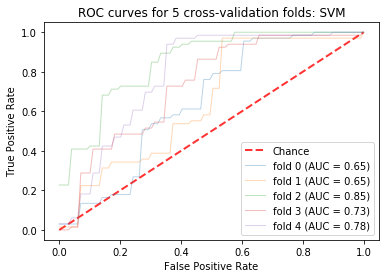

In [29]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

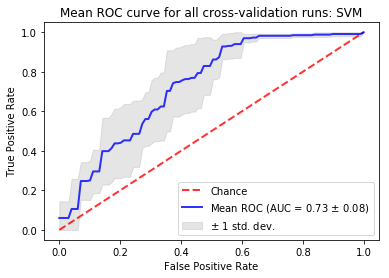

In [30]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Bayes

In [31]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB, _recalls_NB, _precisions_NB = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)


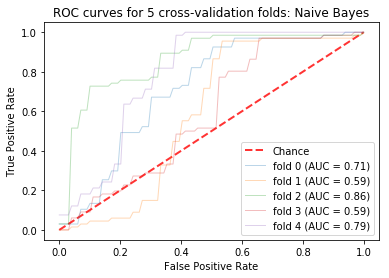

In [32]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

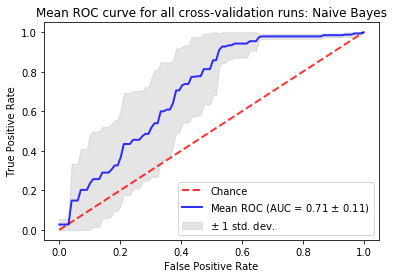

In [33]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Random Forrest

In [34]:
RF_classifier = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_RF, f1_scores_RF, tprs_RF, aucs_RF, _recalls_RF, _precisions_RF = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=RF_classifier, 
                                                                    mean_fpr=mean_fpr)


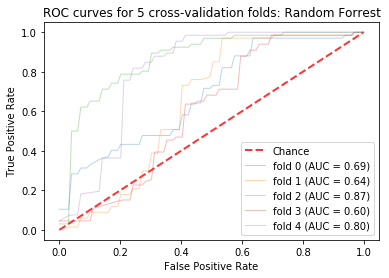

In [35]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_RF, aucs_RF, 'Random Forrest')

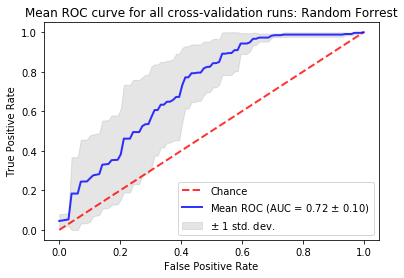

In [36]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_RF, aucs_RF, 'Random Forrest')

###  Compare classifiers

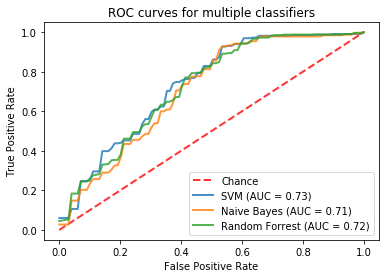

In [37]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_RF, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_RF)]), 
                              np.array(['SVM', 'Naive Bayes', 'Random Forrest']))

The ROC curves for Naive Bayes and Random Forrest match each other.

In [38]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'Random Forrest' : accuracies_RF})

In [39]:
accuracies_df.describe()

,SVM,Naive Bayes,Random Forrest
count,5.000000,5.000000,5.000000
mean,0.808403,0.791670,0.808403
std,0.029567,0.053465,0.029567
min,0.778947,0.715789,0.778947
25%,0.783505,0.762887,0.783505
50%,0.812500,0.804124,0.812500
75%,0.814433,0.822917,0.814433
max,0.852632,0.852632,0.852632


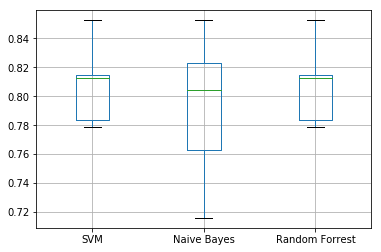

In [40]:
accuracies_df.boxplot()

In [41]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB, 'Random Forrest' : f1_scores_RF})

In [42]:
f1_scores_df.describe()

,SVM,Naive Bayes,Random Forrest
count,5.000000,5.000000,5.000000
mean,0.876278,0.860583,0.876278
std,0.017193,0.036598,0.017193
min,0.860927,0.808511,0.860927
25%,0.860927,0.839161,0.860927
50%,0.878378,0.872483,0.878378
75%,0.878378,0.882759,0.878378
max,0.902778,0.900000,0.902778


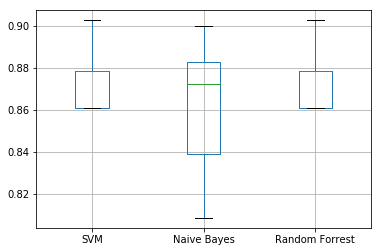

In [43]:
f1_scores_df.boxplot()

#### Observations:

  * The ROC curves are very similar to each other and do not allow us to favor one particular algorithm over another
  * Random Forest is equivalent to SVM in terms of accuracy (same mean, min, max and variance)
  * Random Forest is equivalent to SVM in terms of F1 score (same mean, min, max and variance)
  * As for the previous dataset, we notice a high variance in terms of accuracy and f1 score for the Naive Bayes classifier compared to SVM and Random Forest.
 
As a conclusion, it appears that SVM and Random Forest are indentical in terms of accuracy, f1 score and variance and are equally a better choice than Naive Bayes.
  
<span style="color:red">**The data for SVM and RF are identical. This is strange, is there a bug somewhere?**</span>.



# Task 2
  * Modify the code in both **Lab 4 - Comparison of Classifiers.ipynb** and **Lab4_Functions.ipynb** to boxplot precision and recall for the classifiers trained with loans_et4.csv. 
  * Update your conclusions from Task 1 after evaluating precision and recall.

#### Rubric
  * Beginning: Neither precision and recall plots attempted or implemented successfully.
  * Developing: Precision and recall plots implemented partially. Conclusion about the comparison of the classifiers incomplete.
  * Accomplished: Both precision and recall plots implemented successfully. Conclusion about the comparison of the classifiers does not reflect the observations about precision and recall correctly.
  * Exemplary: Both precision and recall plots implemented successfully. Conclusion about the comparison of the classifiers reflects the observations about precision and recall correctly.

In [44]:
# Compare the statistics of the precision across all cross-validation folds
precision_df = pd.DataFrame(data={'SVM' : _precisions_SVM   , 'Naive Bayes' : _precisions_NB    , 'Random Forrest' : _precisions_RF})
precision_df.describe()

,SVM,Naive Bayes,Random Forrest
count,5.000000,5.000000,5.000000
mean,0.793400,0.800727,0.793400
std,0.026854,0.033546,0.026854
min,0.764706,0.760000,0.764706
25%,0.773810,0.789474,0.773810
50%,0.792683,0.792683,0.792683
75%,0.802469,0.810127,0.802469
max,0.833333,0.851351,0.833333


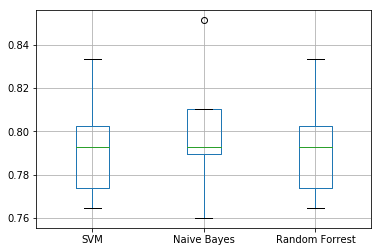

In [45]:
precision_df.boxplot()

In [46]:
# Compare the statistics of the recalls across all cross-validation folds
recalls_df = pd.DataFrame(data={'SVM' : _recalls_SVM   , 'Naive Bayes' : _recalls_NB    , 'Random Forrest' : _recalls_RF})
recalls_df.describe()

,SVM,Naive Bayes,Random Forrest
count,5.000000,5.000000,5.000000
mean,0.978969,0.930710,0.978969
std,0.008051,0.048427,0.008051
min,0.970149,0.863636,0.970149
25%,0.970149,0.895522,0.970149
50%,0.984848,0.954545,0.984848
75%,0.984848,0.969697,0.984848
max,0.984848,0.970149,0.984848


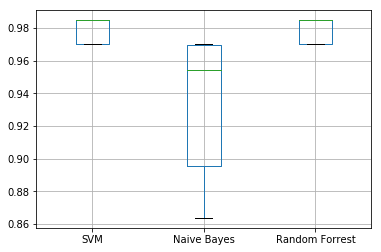

In [47]:
recalls_df.boxplot()

<span style="color:red">Add conclusion!!!!</span>

# Task 3

  * Pick a winner among the classifiers you have trained with loans_et4.csv. 
  * Assume that it is important to minimise the false positives (i.e., Loan_Status predicted to be 1 wrongly). 
  * Look up the training parameters for this classifier on the scikit-learn website. 
    * For example, SVM has more than 10 parameters (see https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). 
    * Experiment with the parameters and see if you can improve the model in terms of accuracy, precision, recall and AUC.
    * You do not have to build a better model but to show that you have explored some of its training parameters. 
    * Summarise your experience with exploring the parameters (max 150 words in a markdown cell).

#### Rubric
  * Beginning: Best classifier not identified.
  * Developing: Best classifier identified. Parameter exploration either not attempted or unsuccessful.
  * Accomplished: Best classifier identified. Parameter exploration attempted but either poorly presented or not summarised correctly.
  * Exemplary: Best classifier identified. Parameter exploration implemented successfully, presented well and summarised correctly. 

References: 
  * https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
  * https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

#### Classifier parameters
Let's start by printing the parameters used by the classifiers we have used so far:

In [48]:
SVM_classifier.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
 NB_classifier.get_params()

{'priors': None}

In [50]:
RF_classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### Best classifier parameters

Let's use GridSearchCV to find the best parameters for the classifiers.

We need to ensure that the scoring favors the True Positives. Since ROC curves deal with optimizing the True Positives and True Negatives, I chose to use the corresponding `roc_auc` scoring function for the gridsearchCV.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [51]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

import time

def make_svc_grid_search(nfolds):
    probas=[True]    
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1, 2]
    kernels=['linear', 'poly', 'rbf']
    degrees =[2,3,4]
    # n_samples / (n_classes * np.bincount(y)) where n_samples=480, n_classes=2 np.bincount(1)=332
    #class_weight =[None, {1: 664}] 
    #class_weight =[None, {0: 148 , 1: 332}] 
    class_weight =[None, {0: 1 , 1: 3}] 

    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels, 'degree': degrees, 'probability' : probas, 'class_weight' : class_weight }
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds, scoring='roc_auc')
    
    return grid_search


def make_nb_grid_search(nfolds):
    # The only parameters that can be used for Naive Bayes are prior probabilities.
    #
    # IMPORTANT: 
    # - Passing prior probabilities would introduce a definite bias and should be avoided.
    # 
    # As a result we are passing no parameters to the grid search. We are only changing the scoring function.
    
    
    param_grid = {}
    NB_classifier = GaussianNB()
    grid_search = GridSearchCV(NB_classifier, param_grid, cv=nfolds, scoring='roc_auc')
    
    return grid_search


def make_rf_grid_search(nfolds):
    n_estimators = [200, 500]
    max_features = ['auto', 'sqrt']
    max_depth = [4,5,6]
    criterion = ['gini', 'entropy']  
    param_grid = { 'n_estimators': n_estimators, 'max_features': max_features, 'max_depth' : max_depth, 'criterion' : criterion}
    
    rf=RandomForestClassifier(random_state=42)    
    grid_search = GridSearchCV(rf, param_grid, cv=nfolds, scoring='roc_auc')
    return grid_search


def run_gridsearch(grid_search, X, y):
    start = time.time()
    print("Starting Grid search. Takes up to 3-5 minutes...")

    grid_search.fit(X, y)
    grid_search.best_params_
    
    end = time.time()
    print("best params:{} found in {} sec".format(grid_search.best_params_, end - start))
    print("best score :", grid_search.best_score_ )
    return grid_search.best_params_, grid_search.best_estimator_, grid_search.best_score_



C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [52]:
best_SVC_params, best_SVC, best_SVC_score = run_gridsearch(make_svc_grid_search(10), predictors, target)

Starting Grid search. Takes up to 3-5 minutes...
best params:{'C': 0.001, 'class_weight': None, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly', 'probability': True} found in 314.43168807029724 sec
best score : 0.7586822001527884


In [53]:
best_NB_params, best_NB, best_NB_score = run_gridsearch(make_nb_grid_search(10), predictors, target)

Starting Grid search. Takes up to 3-5 minutes...
best params:{} found in 0.041002511978149414 sec
best score : 0.69447250870045


In [54]:
best_RF_params, best_RF, best_RF_score = run_gridsearch(make_rf_grid_search(10), predictors, target)

Starting Grid search. Takes up to 3-5 minutes...
best params:{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200} found in 112.20149660110474 sec
best score : 0.6803104575163399


Recap of best parameters for SVM and Random Forest.
The only parameters for the GaussianNB is priors which I don't think is very applicable to us.

| Algorithm        | Best params           | Runtime  |
| ------------- |:-------------:| -----:|
| SVM      | {'C': 0.001, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'probability': True} | 188s |
| Random Forest      | {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}      | 264s |


In [55]:
def run_classifiers_2(clfs):
    for clf in clfs:
        plt.figure(figsize=(25, 5)) 
        p = 141    
        clf_name = get_classifier_shortname(clf)

        accuracies, f1_scores, tprs, aucs, _precisions, _recalls = evaluate_classifier(folds=5, 
                                                                            p=predictors, t=target, 
                                                                            classifier=clf, 
                                                                            mean_fpr=mean_fpr)
        
        plt.subplot(p, frameon=False)
        plot_roc_cv_folds_michel(mean_fpr, tprs, aucs, clf_name, "FP", "TP", show=False)

        p += 1
        plt.subplot(p, frameon=False)
        plot_roc_mean_michel(mean_fpr, tprs, aucs, clf_name, "FP", "TP", show=False)

        plt.tight_layout() 
        plt.show()



In [56]:
def get_classifier_shortname(clf):
    max_len = 15
    clf_name = str(clf)
    clf_name = clf_name.split("(")[0]
    if (len(clf_name) > max_len):
        clf_name = clf_name[0:15] + ".."
    return clf_name

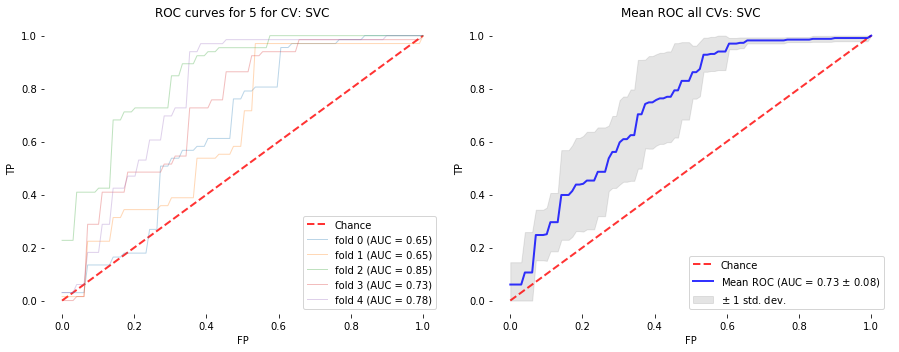

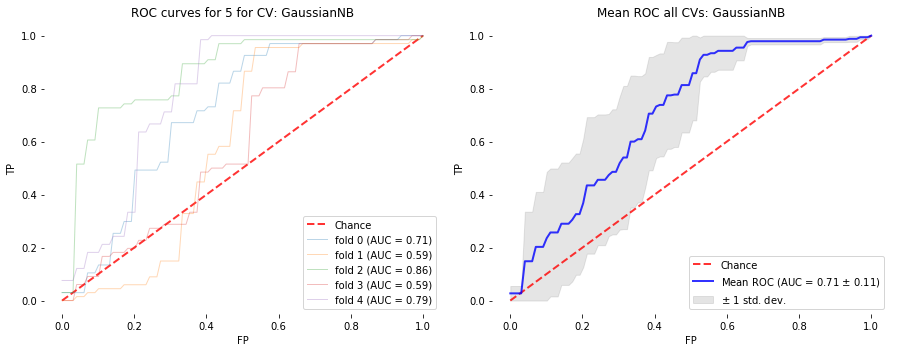

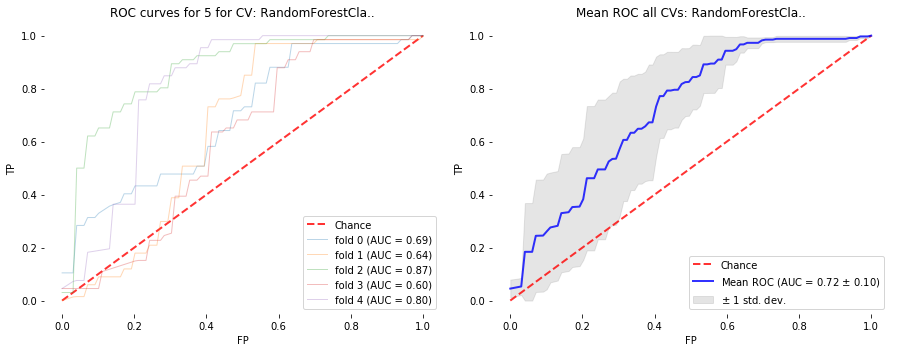

In [57]:
# Using classifiers with default values
clfs = [SVM_classifier, NB_classifier, RF_classifier]
run_classifiers_2(clfs)

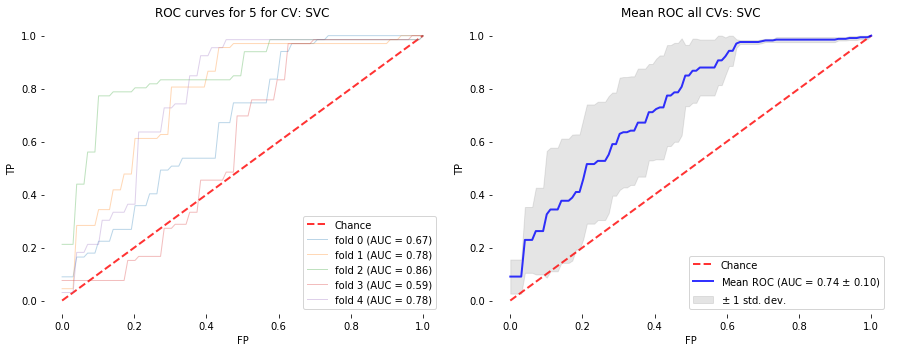

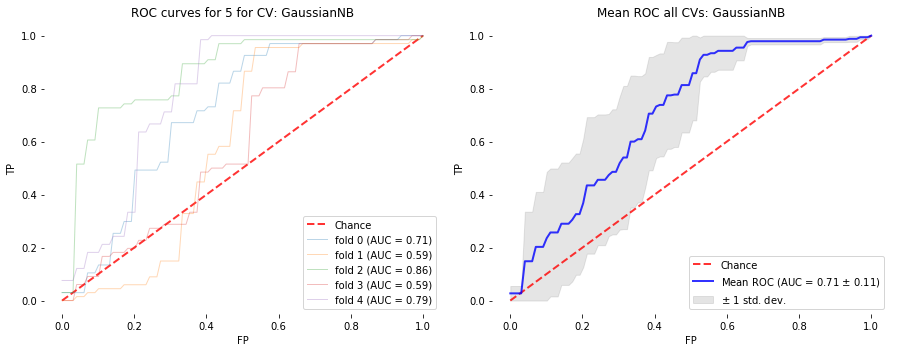

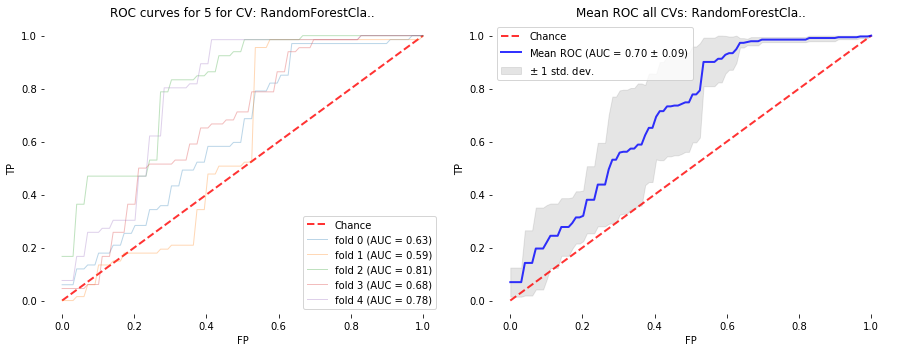

In [58]:
# Using classifiers with optimised parameters found with grid search
clfs = [best_SVC, NB_classifier, best_RF]
run_classifiers_2(clfs)

The results are as follows:

|  Mean ROC recall by precision | Value  | Comment  |
|---|---|---|
|  SVC (default) |  0.73 |  +/- 0.08 |
|  GaussianNb (default)| 0.71  | +/- 0.11  |
|  Random Forest (default)| 0.72  |  +/- 0.10  |
|  SVC (default scoring function) |  0.68 |  +/- 0.09 |
|  Random Forest (default scoring function)| 0.69  |  +/- 0.09  |
|  SVC (**rauc scoring** function) |  0.74 |  +/- 0.1 |
|  Random Forest (**rauc scoring** function)| 0.70  |  +/- 0.09  |


#### Observation regarding the best estimators returned by gridsearchcv:

I was **surprised** to discover that the optimised versions of SVC and Random Forest performed worse than their default counter part. 
I can see a few reasons for this:

  * The score used by the grid search CV is different to the True Positives we are interested in.
  * The grid search CV did not have enough runs to find the optimum parameters
  * The parameters that were sent to the grid search CV were missing from important ones?

#### Observation regarding SVC scoring functions:
After multiple runs of the grid search, it emerged that the scoring function has a lot of impact in our search for the best parameters. After changing SVM to use `roc_auc` instead of the default `mean accuracy` TPs increased sightly above the baseline established earlier, to 74%.

#### Observation regarding the Imbalanced target 
GridsearchCV was given the option to either use No `class_weights` or `class_weights` that match the actual distribution of the target.
Curiously, gridsearchCV return an estimator with **No `class_weights`**. This is surprising since the target is clearly unbalanced. 

#### And the winner is
**SVC default is the winner but ...**. gridsearchCV using `roc_auc` only generated a 0.1% increment over the original version of the SVM estimator. SVM still has a lot of variance at 0.1%, so in the end the improvement over the initial version of the SVM estimator was nearly **insignificant** 

In [59]:
# Retrieve parameters for all classifiers
print(SVM_classifier.get_params)
print(best_SVC.get_params)

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>
<bound method BaseEstimator.get_params of SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>
